In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
import pandas as pd
import sounddevice as sd
import traceback
import hexdump
import crc
import time
from numba import njit

from data_processor import process_file

In [3]:
fn = "../../../dmic/data/serial_20241002_234920.bin"
imu_df, mag_df, env_df, ted_df, audio_df = process_file(
    fn,
    ring_buffer_size=100 * 1024,
    chunk_size=10 * 1024,
    metrics=True,
)

Dropped 4428 of 6431000 bytes (0.07%)
Invalid header CRCs: 0
Invalid data CRCs: 2
Processed 6.13 MB data (86.73 s) in 10.22 seconds


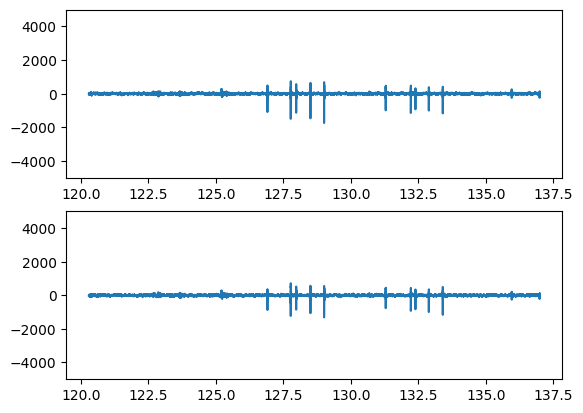

In [17]:
audio_ss = audio_df[(audio_df["time"] > 100.0)]
ylim = np.array([-1, 1]) * 5000

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(audio_ss["time"], audio_ss["left"])
axes[0].set_ylim(ylim)
axes[1].plot(audio_ss["time"], audio_ss["right"])
axes[1].set_ylim(ylim)
plt.show()

In [26]:
fs = 16000
sd.play(audio_ss[["left", "right"]].values, samplerate=fs)

In [22]:
audio_ss

,left,right,time
4800,6,-17,120.297000
4801,24,17,120.297063
4802,15,4,120.297125
4803,7,-1,120.297188
4804,24,6,120.297250
...,...,...,...
271995,-38,-22,136.993687
271996,-22,1,136.993750
271997,-29,1,136.993812
271998,-8,-6,136.993875


In [23]:
audio_ss

,left,right,time
4800,6,-17,120.297000
4801,24,17,120.297063
4802,15,4,120.297125
4803,7,-1,120.297188
4804,24,6,120.297250
...,...,...,...
271995,-38,-22,136.993687
271996,-22,1,136.993750
271997,-29,1,136.993812
271998,-8,-6,136.993875
